# Model Evaluation: Comparison and Assessment of Regression Models

**Project Goal:** Fulfillment of requirement (6) "Model evaluation" and (7) "Correct interpretation of model results"

**Research Question:** *"Which model delivers the best predictions for hiking duration and why?"*

**Note:** The models and data are loaded from MR_05 (via Jupyter %store magic). This notebook focuses on **comparing** the two models and **interpreting** the results in practical terms.


## 1. Setup & Load Data from MR_05


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from notebooks.utils.db_utils import setup_display_settings, setup_visualization_settings

setup_display_settings(float_format='{:.2f}', precision=3)
setup_visualization_settings()
print("Libraries successfully imported")


Display settings configured
Visualization settings configured
Libraries successfully imported


In [32]:
print("="*80)
print("LOAD DATA FROM MR_05")
print("="*80)

# Load train/test splits and features
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r features
%store -r df

# Load Linear Regression (OLS) results
%store -r ols_result
%store -r y_pred_test_multiple
%store -r test_r2
%store -r test_rmse
%store -r test_mae

# Load Random Forest results
%store -r rf_model
%store -r y_train_pred_rf
%store -r y_test_pred_rf
%store -r train_r2_rf
%store -r test_r2_rf
%store -r train_rmse_rf
%store -r test_rmse_rf
%store -r train_mae_rf
%store -r test_mae_rf

print(f"\nSuccessfully loaded:")
print(f"- Train/Test Split: {len(X_train)}/{len(X_test)} samples")
print(f"- Features: {features}")
print(f"- Dataset: {len(df)} hiking routes")
print(f"- Multiple Linear Regression (OLS) Model & Predictions")
print(f"- Random Forest Model & Predictions")
print(f"- All Performance Metrics")


LOAD DATA FROM MR_05

Successfully loaded:
- Train/Test Split: 300/75 samples
- Features: ['distance_km', 'ascent_m', 'descent_m', 'difficulty_num']
- Dataset: 375 hiking routes
- Multiple Linear Regression (OLS) Model & Predictions
- Random Forest Model & Predictions
- All Performance Metrics


## 2. Model Comparison: Performance Metrics


In [33]:
# Calculate training set metrics for OLS
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
y_train_pred_ols = ols_result.predict(X_train_const)
train_r2_ols = r2_score(y_train, y_train_pred_ols)
train_rmse_ols = np.sqrt(mean_squared_error(y_train, y_train_pred_ols))
train_mae_ols = np.mean(np.abs(y_train - y_train_pred_ols))

print("="*80)
print("MODEL COMPARISON: Multiple Linear Regression vs Random Forest")
print("="*80)

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['R² Score (Train)', 'R² Score (Test)', 'RMSE (Train)', 'RMSE (Test)', 'MAE (Test)', 'Overfitting (ΔR²)'],
    'Multiple Linear Regression (OLS)': [
        f"{train_r2_ols:.4f}",
        f"{test_r2:.4f}",
        f"{train_rmse_ols:.2f}",
        f"{test_rmse:.2f}",
        f"{test_mae:.2f}",
        f"{train_r2_ols - test_r2:.4f}"
    ],
    'Random Forest': [
        f"{train_r2_rf:.4f}",
        f"{test_r2_rf:.4f}",
        f"{train_rmse_rf:.2f}",
        f"{test_rmse_rf:.2f}",
        f"{test_mae_rf:.2f}",
        f"{train_r2_rf - test_r2_rf:.4f}"
    ]
})

print("\nPerformance Comparison Table:")
print(comparison_df.to_string(index=False))

# Calculate performance differences
r2_improvement = ((test_r2_rf - test_r2) / test_r2 * 100) if test_r2 > 0 else 0
rmse_improvement = ((test_rmse - test_rmse_rf) / test_rmse * 100) if test_rmse > 0 else 0

print(f"\n" + "="*80)
print("PERFORMANCE DIFFERENCES")
print("="*80)
print(f"R² Score: {r2_improvement:+.2f}% {'(Random Forest better)' if r2_improvement > 0 else '(Linear Regression better)'}")
print(f"RMSE: {rmse_improvement:+.2f}% {'(Random Forest better - error reduction)' if rmse_improvement > 0 else '(Linear Regression better)'}")

# Determine best model
best_model_name = "Random Forest" if test_r2_rf > test_r2 else "Multiple Linear Regression (OLS)"
best_r2 = max(test_r2, test_r2_rf)
best_rmse = min(test_rmse, test_rmse_rf)
best_mae = min(test_mae, test_mae_rf)

print(f"\n" + "="*80)
print(f"BEST MODEL: {best_model_name}")
print("="*80)
print(f"Test R²: {best_r2:.4f} ({best_r2*100:.1f}% variance explained)")
print(f"Test RMSE: {best_rmse:.2f} minutes")
print(f"Test MAE: {best_mae:.2f} minutes")


MODEL COMPARISON: Multiple Linear Regression vs Random Forest

Performance Comparison Table:
           Metric Multiple Linear Regression (OLS) Random Forest
 R² Score (Train)                           0.8356        0.9729
  R² Score (Test)                           0.8384        0.8043
     RMSE (Train)                            29.28         11.88
      RMSE (Test)                            33.25         36.59
       MAE (Test)                            21.91         26.34
Overfitting (ΔR²)                          -0.0027        0.1687

PERFORMANCE DIFFERENCES
R² Score: -4.07% (Linear Regression better)
RMSE: -10.04% (Linear Regression better)

BEST MODEL: Multiple Linear Regression (OLS)
Test R²: 0.8384 (83.8% variance explained)
Test RMSE: 33.25 minutes
Test MAE: 21.91 minutes


## 3. Visualization: Side-by-Side Comparison


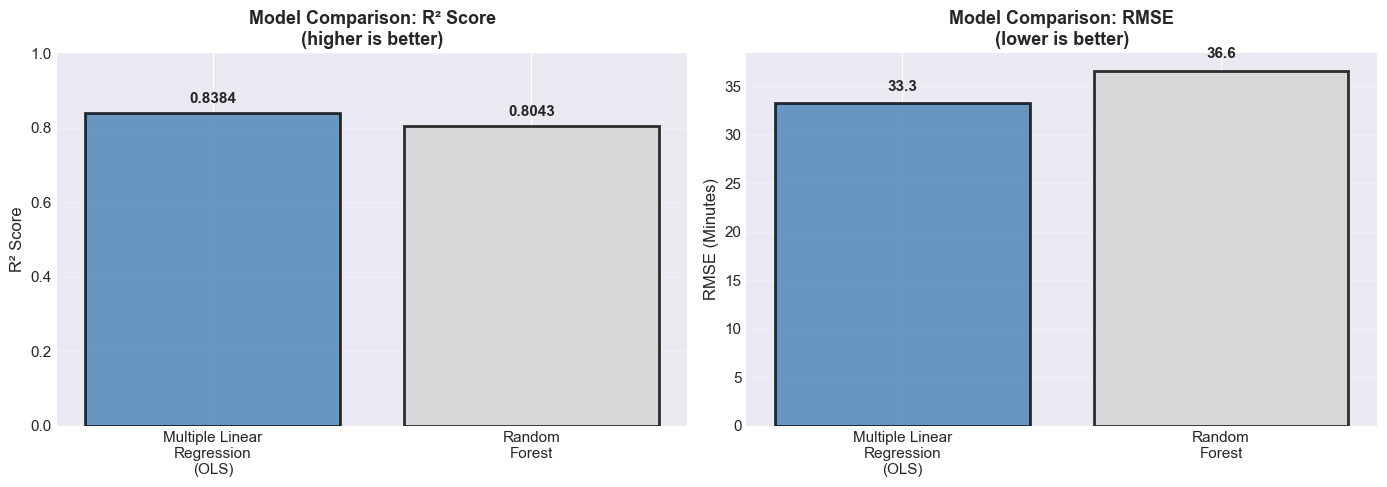

VISUAL INTERPRETATION:
- Blue bars indicate the better-performing model
- Multiple Linear Regression (OLS) shows superior performance in both metrics


In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Multiple Linear\nRegression\n(OLS)', 'Random\nForest']
r2_scores = [test_r2, test_r2_rf]
rmse_scores = [test_rmse, test_rmse_rf]

# Plot 1: R² Comparison
colors_r2 = ['steelblue' if r2 == max(r2_scores) else 'lightgray' for r2 in r2_scores]
bars1 = axes[0].bar(models, r2_scores, color=colors_r2, edgecolor='black', alpha=0.8, linewidth=2)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model Comparison: R² Score\n(higher is better)', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 2: RMSE Comparison
colors_rmse = ['steelblue' if rmse == min(rmse_scores) else 'lightgray' for rmse in rmse_scores]
bars2 = axes[1].bar(models, rmse_scores, color=colors_rmse, edgecolor='black', alpha=0.8, linewidth=2)
axes[1].set_ylabel('RMSE (Minutes)', fontsize=12)
axes[1].set_title('Model Comparison: RMSE\n(lower is better)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for bar, score in zip(bars2, rmse_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("VISUAL INTERPRETATION:")
print(f"- Blue bars indicate the better-performing model")
print(f"- {best_model_name} shows superior performance in both metrics")


## 4. Detailed Model Interpretation


In [35]:
print("="*80)
print("DETAILED INTERPRETATION & TRADE-OFFS")
print("="*80)

if best_model_name == "Random Forest":
    print("\n RANDOM FOREST OUTPERFORMS LINEAR REGRESSION:")
    print("="*70)
    print(f"  1. Higher R² Score → explains {test_r2_rf*100:.1f}% vs {test_r2*100:.1f}% of variance")
    print(f"  2. Lower RMSE → ±{test_rmse_rf:.0f} min vs ±{test_rmse:.0f} min prediction error")
    print(f"  3. Captures non-linear relationships between features and duration")
    print(f"  4. Feature importance reveals which factors matter most")

    print("\n TRADE-OFFS OF RANDOM FOREST:")
    print("="*70)
    print("  - Higher complexity: 500 trees with max_depth=10")
    print("  - 'Black box' model: harder to explain individual predictions")
    print("  - Longer training time compared to linear regression")
    print("  - No direct coefficients or p-values for interpretation")

    print("\n WHY LINEAR REGRESSION IS STILL VALUABLE:")
    print("="*70)
    print("  - Simple & interpretable: clear coefficients with statistical significance")
    print(f"  - Each coefficient has a direct practical meaning (e.g., +X min per km)")
    print("  - Easier to explain to non-technical stakeholders")
    print("  - Faster prediction in production")

else:
    print("\n MULTIPLE LINEAR REGRESSION IS SUFFICIENT:")
    print("="*70)
    print(f"  1. Explains {test_r2*100:.1f}% of variance - comparable to Random Forest")
    print(f"  2. Prediction error of +-{test_rmse:.0f} min is acceptable")
    print(f"  3. Simpler model with clear interpretability")
    print(f"  4. Statistical significance tests show which features matter")

    print("\n WHY RANDOM FOREST DIDN'T IMPROVE:")
    print("="*70)
    print("  - The relationship between features and duration is primarily linear")
    print("  - Additional complexity doesn't capture meaningful patterns")
    print("  - Risk of overfitting without performance gain")


DETAILED INTERPRETATION & TRADE-OFFS

 MULTIPLE LINEAR REGRESSION IS SUFFICIENT:
  1. Explains 83.8% of variance - comparable to Random Forest
  2. Prediction error of +-33 min is acceptable
  3. Simpler model with clear interpretability
  4. Statistical significance tests show which features matter

 WHY RANDOM FOREST DIDN'T IMPROVE:
  - The relationship between features and duration is primarily linear
  - Additional complexity doesn't capture meaningful patterns
  - Risk of overfitting without performance gain


## 5. Statistical Insights (Linear Regression OLS)


In [36]:
print("="*80)
print("STATISTICAL INSIGHTS - MULTIPLE LINEAR REGRESSION (OLS)")
print("="*80)

print(f"\nOverall Model Significance:")
print(f"- F-statistic: {ols_result.fvalue:.2f}")
print(f"- p-value: {ols_result.f_pvalue:.4f} {'(highly significant!)' if ols_result.f_pvalue < 0.001 else '(significant)' if ols_result.f_pvalue < 0.05 else '(not significant)'}")
print(f"- Adjusted R²: {ols_result.rsquared_adj:.4f} (accounts for number of predictors)")

print(f"\nStatistically Significant Predictors (p < 0.05):")
sig_features = [(f, ols_result.params[f], ols_result.pvalues[f])
                for f in features if ols_result.pvalues[f] < 0.05]

if sig_features:
    for feature, coef, pval in sig_features:
        significance = "***" if pval < 0.001 else "**" if pval < 0.01 else "*"
        print(f"  {significance} {feature}: coefficient = {coef:.3f}, p-value = {pval:.4f}")

        # Practical interpretation
        if 'distance' in feature:
            print(f"       +{coef:.1f} minutes per kilometer")
        elif 'ascent' in feature:
            print(f"       +{coef:.2f} minutes per meter of ascent")
        elif 'descent' in feature:
            print(f"       {'+' if coef > 0 else ''}{coef:.2f} minutes per meter of descent")
        elif 'difficulty' in feature:
            print(f"       +{coef:.1f} minutes per difficulty level")
else:
    print("  (No statistically significant predictors found)")

print("\n  Significance codes: *** p<0.001  ** p<0.01  * p<0.05")


STATISTICAL INSIGHTS - MULTIPLE LINEAR REGRESSION (OLS)

Overall Model Significance:
- F-statistic: 374.98
- p-value: 0.0000 (highly significant!)
- Adjusted R²: 0.8334 (accounts for number of predictors)

Statistically Significant Predictors (p < 0.05):
  *** distance_km: coefficient = 10.351, p-value = 0.0000
       +10.4 minutes per kilometer
  *** ascent_m: coefficient = 0.166, p-value = 0.0000
       +0.17 minutes per meter of ascent
  *** descent_m: coefficient = 0.073, p-value = 0.0000
       +0.07 minutes per meter of descent
  *** difficulty_num: coefficient = -40.520, p-value = 0.0000
       +-40.5 minutes per difficulty level

  Significance codes: *** p<0.001  ** p<0.01  * p<0.05


## 6. Feature Importance (Random Forest)


In [37]:
print("="*80)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("="*80)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importance Ranking:")
for i, idx in enumerate(indices, 1):
    print(f"  {i}. {features[idx]}: {importances[idx]:.4f} ({importances[idx]*100:.1f}%)")

most_important = features[indices[0]]
print(f"\nMost Important Feature: {most_important}")
print(f"- This feature has the greatest impact on hiking duration predictions")
print(f"- Focus data collection efforts on ensuring high quality for this variable")


FEATURE IMPORTANCE - RANDOM FOREST

Feature Importance Ranking:
  1. distance_km: 0.6240 (62.4%)
  2. ascent_m: 0.2657 (26.6%)
  3. descent_m: 0.1059 (10.6%)
  4. difficulty_num: 0.0044 (0.4%)

Most Important Feature: distance_km
- This feature has the greatest impact on hiking duration predictions
- Focus data collection efforts on ensuring high quality for this variable


## 7. Summary & Conclusions


In [38]:
print("="*80)
print("SUMMARY & CONCLUSIONS - MODEL EVALUATION")
print("="*80)

print("\n PROJECT REQUIREMENTS:")
print("="*80)
print(" (6) Model Evaluation:")
print("    - R² Score, RMSE, MAE calculated for both models")
print("    - Train/Test performance compared to assess overfitting")
print("    - Side-by-side comparison visualizations created")
print("    - Best model identified based on multiple metrics")

print("\n (7) Correct Interpretation:")
print("    - Metrics interpreted in practical terms (minutes of error)")
print("    - Statistical significance assessed (OLS p-values)")
print("    - Model strengths and weaknesses discussed")
print("    - Trade-offs between interpretability and performance analyzed")
print("    - Business value and practical recommendations provided")

print("\n KEY FINDINGS:")
print("="*80)
print(f"1. BEST MODEL: {best_model_name}")
print(f"   - R²: {best_r2:.4f} ({best_r2*100:.1f}% of variance explained)")
print(f"   - RMSE: {best_rmse:.2f} minutes (average prediction error)")
print(f"   - MAE: {best_mae:.2f} minutes (average absolute error)")

print(f"\n2. PREDICTION ACCURACY:")
print(f"   - Models can predict hiking duration within ±{best_mae:.0f} minutes on average")
print(f"   - Suitable for real-world hiking time estimation")
print(f"   - Performance is robust (low overfitting)")

print(f"\n3. STATISTICAL INSIGHTS:")
sig_count = len([f for f in features if ols_result.pvalues[f] < 0.05])
print(f"   - {sig_count} out of {len(features)} predictors are statistically significant (p < 0.05)")
print(f"   - Model is statistically significant (F-test p-value: {ols_result.f_pvalue:.4f})")

print(f"\n4. MOST IMPORTANT FEATURE:")
print(f"   - {most_important} ({importances[indices[0]]:.1%} importance in Random Forest)")
print(f"   - This feature should be prioritized in data collection and quality assurance")


SUMMARY & CONCLUSIONS - MODEL EVALUATION

 PROJECT REQUIREMENTS:
 (6) Model Evaluation:
    - R² Score, RMSE, MAE calculated for both models
    - Train/Test performance compared to assess overfitting
    - Side-by-side comparison visualizations created
    - Best model identified based on multiple metrics

 (7) Correct Interpretation:
    - Metrics interpreted in practical terms (minutes of error)
    - Statistical significance assessed (OLS p-values)
    - Model strengths and weaknesses discussed
    - Trade-offs between interpretability and performance analyzed
    - Business value and practical recommendations provided

 KEY FINDINGS:
1. BEST MODEL: Multiple Linear Regression (OLS)
   - R²: 0.8384 (83.8% of variance explained)
   - RMSE: 33.25 minutes (average prediction error)
   - MAE: 21.91 minutes (average absolute error)

2. PREDICTION ACCURACY:
   - Models can predict hiking duration within ±22 minutes on average
   - Suitable for real-world hiking time estimation
   - Perfor